# Extracting Data using OnePY

In [1]:
import sys
sys.path.insert(0,"/home/lg3u19/Documents/OnetepUtils/OnePY")
import onetep_v0_1 as op
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# remove all the slurm .out files from directory
#for directory in pathlib.Path.cwd().iterdir():
 #   if directory.is_dir():
  #      !rm $directory/slurm*

In [3]:
raw = op.load_from_dir("./",pass_format_flag=False)

In [5]:
for key in raw.keys():
    for nested_key in raw[key].keys():
        raw[key][nested_key].get_all()

## Extracting, colating and plotting timings

In [6]:
temp_dict = {}
for key in raw.keys():
    for nested_key in raw[key].keys():
        temp_dict[key]=[raw[key][nested_key].time_total,raw[key][nested_key].atoms_total]
timings = pd.DataFrame.from_dict(temp_dict,columns=["time",'atoms'],orient='index')
timings = timings.sort_values(by=['time'])
timings['time_h']=timings['time']/60.0/60.0
timings

,time,atoms,time_h
p016,1433.181,1712,0.398106
p032,2799.869,3424,0.777741
p048,4403.366,5136,1.223157
p064,6159.532,6848,1.710981
p080,7603.914,8560,2.112198
p096,9042.437,10272,2.511788
p112,10948.922,11984,3.041367
p128,12381.340,13696,3.439261


Text(0, 0.5, 'Wall time (h)')

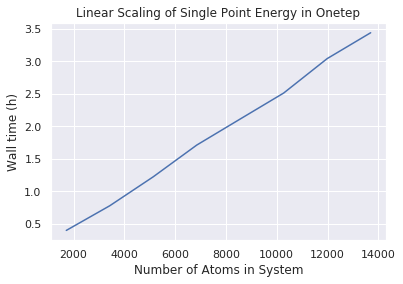

In [10]:
plot = sns.lineplot(data=timings,x='atoms',y='time_h')
plot.set_title("Linear Scaling of Single Point Energy in Onetep")
plot.set_xlabel("Number of Atoms in System")
plot.set_ylabel("Wall time (h)")

In [11]:
128*1.3

166.4